
     MA    FA   Cs   Cl   Br    I  Bandgap_Predicted  Calculated_bandgap
0  1.00  0.00  0.0  0.0  0.0  1.0               1.60                1.59
1  0.70  0.20  0.1  0.0  0.0  1.0               1.56                1.53
2  0.50  0.40  0.1  0.0  0.0  1.0               1.54                1.51
3  0.40  0.50  0.1  0.0  0.0  1.0               1.52                1.50
4  0.25  0.75  0.0  0.0  0.0  1.0               1.55                1.51



1/1 [==============================] - 0s 164ms/step
Neural Network - RMSE: 0.2374242352800156
Neural Network - R-squared: 0.6145486600617764
Neural Network - Pearson Correlation Coefficient: 0.9193686060277343


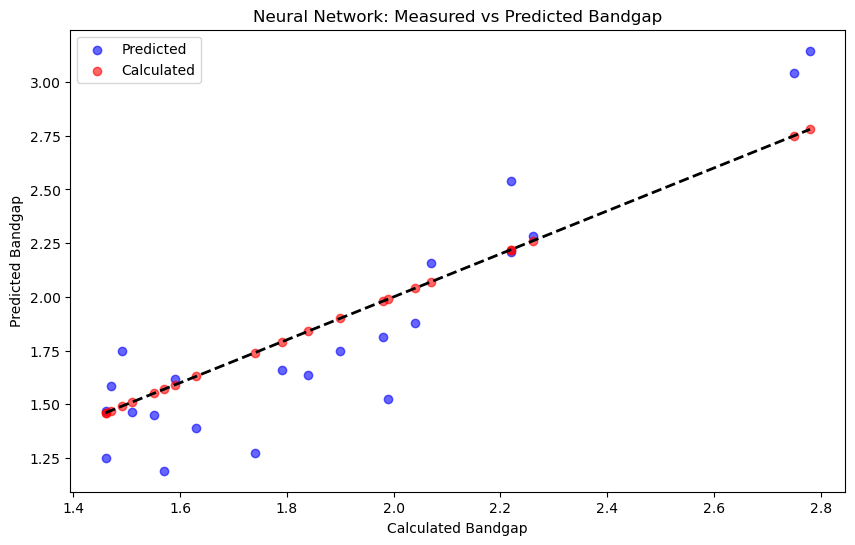

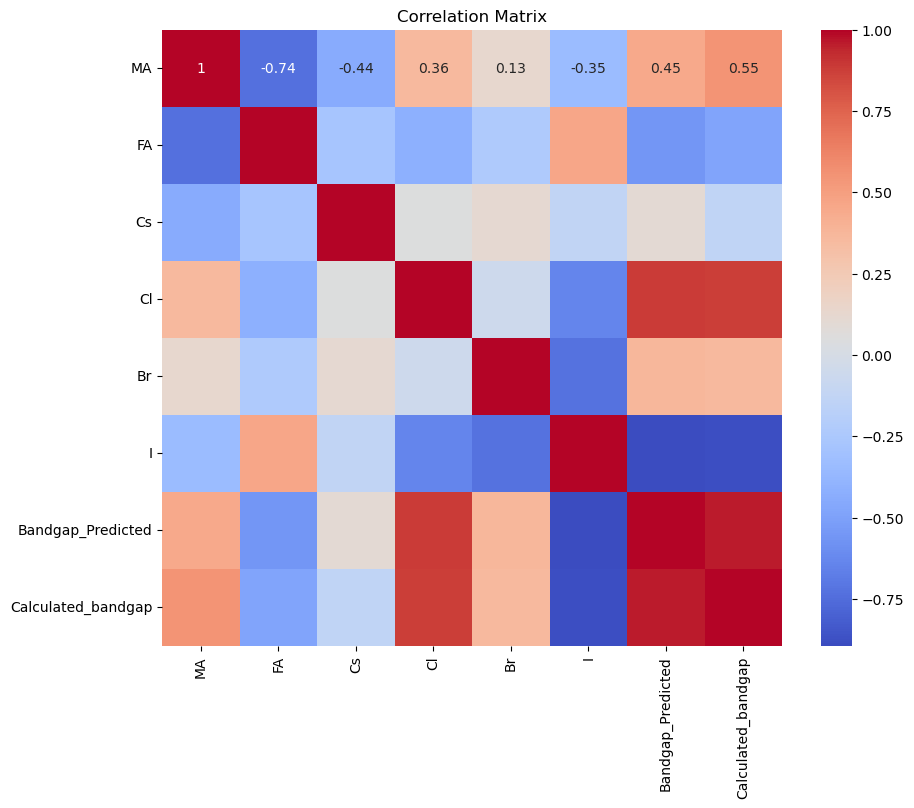

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Separate the features (X) and the target variable (y)
X = data.drop('Calculated_bandgap', axis=1)  # Assuming 'Calculated_bandgap' is the target variable
y = data['Calculated_bandgap']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Initialize and train the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
pearson_corr = np.corrcoef(y_test.values.ravel(), y_pred.ravel())[0, 1]

print(f'Neural Network - RMSE: {rmse}')
print(f'Neural Network - R-squared: {r2}')
print(f'Neural Network - Pearson Correlation Coefficient: {pearson_corr}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.6, color='r', label='Calculated')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Comment out or remove this line
plt.xlabel('Calculated Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Neural Network: Measured vs Predicted Bandgap')
plt.legend()
plt.show()

# Plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
